In [34]:
import pandas as pd
import numpy as np

In [35]:
df=pd.read_csv('iris.csv')
df.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
129,7.2,3.0,5.8,1.6,Virginica
146,6.3,2.5,5.0,1.9,Virginica
141,6.9,3.1,5.1,2.3,Virginica
0,5.1,3.5,1.4,0.2,Setosa
45,4.8,3.0,1.4,0.3,Setosa
6,4.6,3.4,1.4,0.3,Setosa
60,5.0,2.0,3.5,1.0,Versicolor
108,6.7,2.5,5.8,1.8,Virginica
144,6.7,3.3,5.7,2.5,Virginica
15,5.7,4.4,1.5,0.4,Setosa


In [36]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
labels = df['variety']
c=labels.astype('category')
labels=c.cat.codes
class_names=c.cat.categories
labels.head(5)
df=df.drop(columns=['variety'],axis=1)

In [38]:
class_names
som_width=20
som_length=20
epoch=50000
initial_learning_rate=0.01

In [39]:
from sklearn.preprocessing import MinMaxScaler
df=pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(df.values))
df.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [40]:
from minisom import MiniSom
som_net=MiniSom(som_length,som_width,4,learning_rate=0.01,neighborhood_function='gaussian')
som_net.train_random(df.to_numpy(),50000)

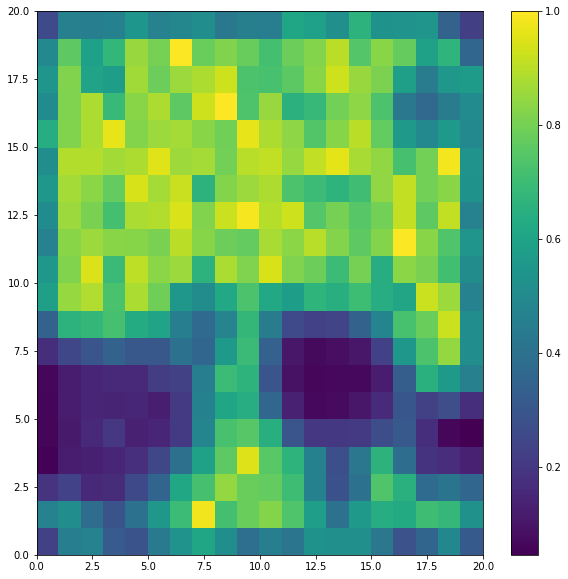

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.pcolor(som_net.distance_map().T,cmap='viridis')
plt.colorbar()

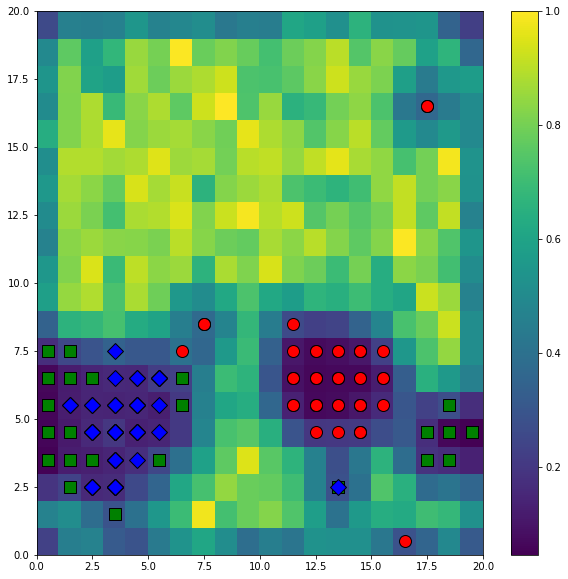

In [42]:
markers=['o','s','D']
colors=['r','g','b']
plt.figure(figsize=(10,10))
plt.pcolor(som_net.distance_map().T,cmap='viridis')
plt.colorbar()

for i,z in enumerate(df.to_numpy()):
    w=som_net.winner(z)
    plt.plot(w[0]+0.5,w[1]+0.5,markers[labels[i]],markersize=12,markerfacecolor=colors[labels[i]],markeredgecolor='k')